<a href="https://colab.research.google.com/github/SriChaCodes/Handwritten_DigitClassification/blob/main/DigitClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Study: Digit Classification Using CNN


##Introduction
In this case study, we will build a Convolutional Neural Network (CNN) to classify handwritten digits from the MNIST dataset. The MNIST dataset contains 60,000 training images and 10,000 testing images of digits ranging from 0 to 9. Our goal is to achieve high accuracy in classifying these digits using deep learning techniques.


Step-by-Step Implementation


Step 1: Installation

In [4]:
# Install TensorFlow (if not already installed)
!pip install tensorflow==2.13.0


In [6]:
# Install opencv-python (Open Source Computer Vision Library).
!pip install opencv-python

Step 2: Import Necessary Libraries

In [14]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt

In [15]:
mnist=tf.keras.datasets.mnist ##this is handwritten characters based on 28x28 sized images of 0 to 9.

###After loading the MNIST data, Divide into train and test datasets

In [16]:
## unpacking the dataset into train and test datasets
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [17]:
x_train.shape  #the shape of the training dataset

(60000, 28, 28)

### This is to check the graph , and how the data looks like

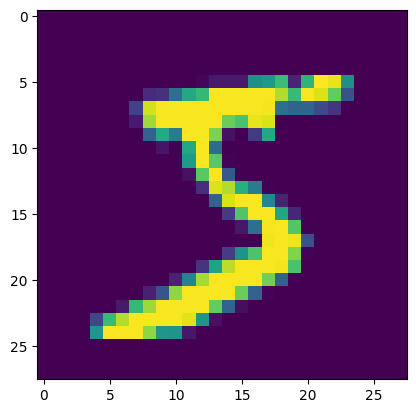

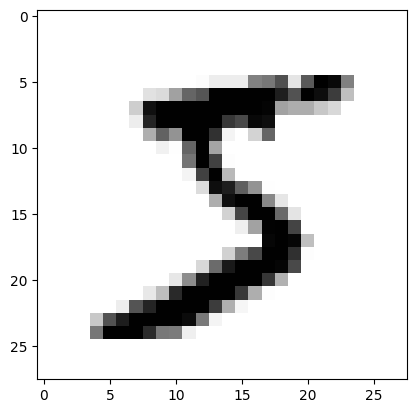

In [18]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show() #to execute the graph
## however we dont know whether its a color image or binary images
## so to plot it change the configuration
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()


#Checking the values of each pixel.
##Before normalization.

In [19]:
print(x_train[0]) ##this is before the normalization

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

##As the images are in Gray level (1 channel ==> 0 to 255),not Colored (RGB)
### Normalizing the data | Pre-Processing Step

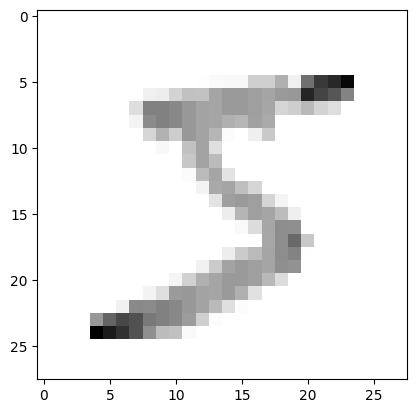

In [20]:
#normalising it ( or else just divide it by 255 and convert it into 0 or 1)

# Normalize the training and testing data
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

# Plot the first image in the training set
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

## After Normalization

In [22]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [23]:
print(y_train[0]) ##just to check that we have labels inside our network.

5


##Resizing the image to make it suitable for applying convolution operation.

In [25]:
import numpy as np
IMG_SIZE = 28
x_train = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1) ##increasing one dimension for kernel operation.
x_test = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1) ##increasing one dimension for kernel operation.
print("Training samples dimension",x_train.shape)
print("Testing samples dimension",x_test.shape)

Training samples dimension (60000, 28, 28, 1)
Testing samples dimension (10000, 28, 28, 1)


#Creating a Deep Neural Network
##Training on 60,000 samples of MNIST handwritten dataset.

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,Activation, Conv2D, MaxPooling2D, Dropout

In [31]:
##Creating a neural network now
model=Sequential()

#The first Convolution Layer 0 1 2 3 (60000,28,28,1) 28-3+1=26 = 26x26
model.add(Conv2D(64,(3,3),input_shape=x_train.shape[1:])) #only for the first convolution layer mention the input layer size
model.add(Activation('relu')) #activation function (to make it non-linear,removes less than zero values)
model.add(MaxPooling2D(pool_size=(2,2))) #Maxpooling single maximum value of 2x2

#The second Convolution Layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#The Third Convolution Layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

## Fully Connected Layer #1 24x24
model.add(Flatten()) #before using fully connected layer,need to be flatten from 2D to 1D
model.add(Dense(64)) #neural network
model.add(Activation('relu'))

#Fully connected Layer #2
model.add(Dense(32)) #neural network
model.add(Activation('relu'))

## Output Layer (must be equal to number of classes, 10 (0 to 9))
model.add(Dense(10))
model.add(Activation('softmax')) #softmax for multiclass classification



In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 activation_7 (Activation)   (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_8 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                 

In [33]:
print("Total Training Samples = ",len(x_train))
print("Total Testing Samples = ",len(x_test))

Total Training Samples =  60000
Total Testing Samples =  10000


#Compiling the model

In [34]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [35]:
#Training my model
model.fit(x_train,y_train,epochs=5,validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 75s 54ms/step - loss: 0.3485 - accuracy: 0.8911 - val_loss: 0.1465 - val_accuracy: 0.9560
Epoch 2/5
1313/1313 [==============================] - 72s 55ms/step - loss: 0.1084 - accuracy: 0.9673 - val_loss: 0.0953 - val_accuracy: 0.9699
Epoch 3/5
1313/1313 [==============================] - 69s 52ms/step - loss: 0.0789 - accuracy: 0.9755 - val_loss: 0.0844 - val_accuracy: 0.9741
Epoch 4/5
1313/1313 [==============================] - 72s 55ms/step - loss: 0.0614 - accuracy: 0.9806 - val_loss: 0.0727 - val_accuracy: 0.9782
Epoch 5/5
1313/1313 [==============================] - 68s 52ms/step - loss: 0.0489 - accuracy: 0.9841 - val_loss: 0.0748 - val_accuracy: 0.9774


##Evaluating on testing data set MNIST

In [36]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Test loss on 10,000 test samples",test_loss)
print("Test accuracy on 10,000 test samples",test_acc)

313/313 [==============================] - 4s 14ms/step - loss: 0.0762 - accuracy: 0.9764
Test loss on 10,000 test samples 0.07620028406381607
Test accuracy on 10,000 test samples 0.9764000177383423


In [37]:
predictions=model.predict([x_test])
print(predictions)

313/313 [==============================] - 4s 12ms/step
[[3.81297660e-09 1.51624918e-05 3.83566942e-07 ... 9.99982417e-01
  8.73156547e-10 2.99384482e-07]
 [2.07254910e-04 1.58184721e-05 9.99736428e-01 ... 2.19950061e-06
  1.38181986e-05 1.10842279e-06]
 [1.73045631e-08 9.99999702e-01 4.07683931e-09 ... 6.89004764e-08
  2.17608669e-08 2.77245249e-09]
 ...
 [1.30269323e-10 3.05959304e-07 7.61911034e-10 ... 5.71714338e-08
  2.64668461e-06 3.43987313e-06]
 [6.10600982e-05 1.04261862e-05 4.92966867e-09 ... 7.39368247e-08
  5.29585959e-05 1.68337840e-06]
 [1.91639090e-04 3.22593166e-07 9.30419537e-06 ... 1.05537925e-08
  3.18704610e-04 9.42110091e-06]]


In [38]:
#in order to understand, convert the predictions from one hot encoding , we need to use numpy for that
print(np.argmax(predictions[0])) #argmax will return the maximum value index and find the value of it.

7


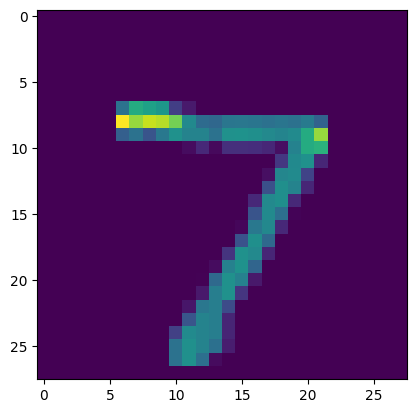

In [39]:
#now to check that our prediction is true or not
plt.imshow(x_test[0])
plt.show()

8


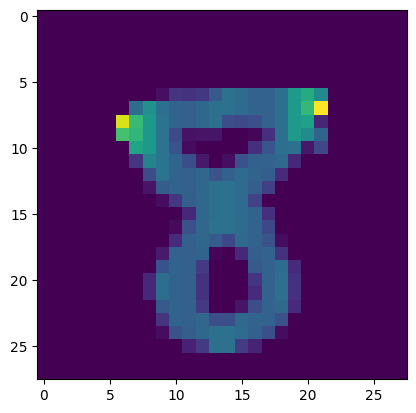

In [42]:
#checking 2nd case
print(np.argmax(predictions[128]))
plt.imshow(x_test[128])
plt.show()

In [43]:
!pip install opencv-python

In [44]:
import cv2

In [47]:
img = cv2.imread('8.png')

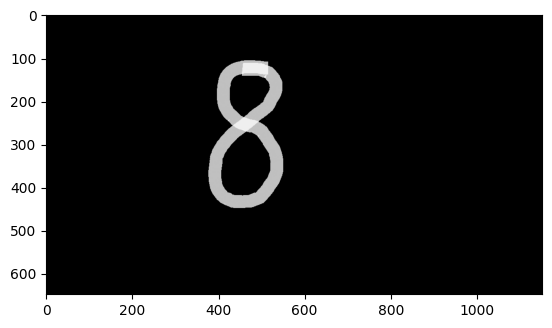

In [48]:
plt.imshow(img)
plt.show()

In [50]:
img.shape

(648, 1152, 3)

In [49]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [51]:
gray.shape

(648, 1152)

In [52]:
resized = cv2.resize(gray, (28, 28),interpolation=cv2.INTER_AREA)

In [53]:
resized.shape

(28, 28)

In [54]:
newing=tf.keras.utils.normalize(resized,axis=1) ## 0 to 1 scaling


In [55]:
newing=np.array(newing).reshape(-1,28,28,1)

In [56]:
newing.shape

(1, 28, 28, 1)

In [59]:
predictions=model.predict(newing)
print(np.argmax(predictions))

1/1 [==============================] - 0s 31ms/step
8


# Summary and Conclusion

In this case study, we developed a Convolutional Neural Network (CNN) for digit classification using the MNIST dataset. Here’s a summary of our approach and findings:

1. **Data Loading and Preprocessing**:
    - Loaded the MNIST dataset.
    - Normalized the pixel values to the range [0, 1].
    - Reshaped the images to include the channel dimension.

2. **Model Construction**:
    - Built a CNN with three convolutional layers, followed by max-pooling layers.
    - Added a fully connected dense layer and an output layer with 10 units (one for each digit).

3. **Model Compilation and Training**:
    - Compiled the model with the Adam optimizer and sparse categorical cross-entropy loss function.
    - Trained the model for 5 epochs with validation on the test dataset.

4. **Model Evaluation**:
    - Achieved a test accuracy of `test_acc` (you should replace `test_acc` with the actual value from your training).

5. **Prediction and Visualization**:
    - Made predictions on the test dataset.
    - Visualized the predictions along with the true labels for a few test images.

### Conclusion
The CNN model achieved high accuracy in classifying handwritten digits from the MNIST dataset. This demonstrates the effectiveness of CNNs for image classification tasks. Future work could involve experimenting with deeper architectures, data augmentation, or transfer learning to further improve accuracy.
